In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#read in data files set index to the States and drop null variables
beds_df=pd.read_csv("beds_17-20df.csv").dropna(how='any').set_index('State',drop=True)
pop_df=pd.read_csv("homeless_pop17-20.csv").dropna(how='any').set_index('State',drop=True)
pop2020_df=pd.read_csv("2020justcount.csv").dropna(how='any')
beds2020_df=pd.read_csv("beds20count.csv").dropna(how='any')


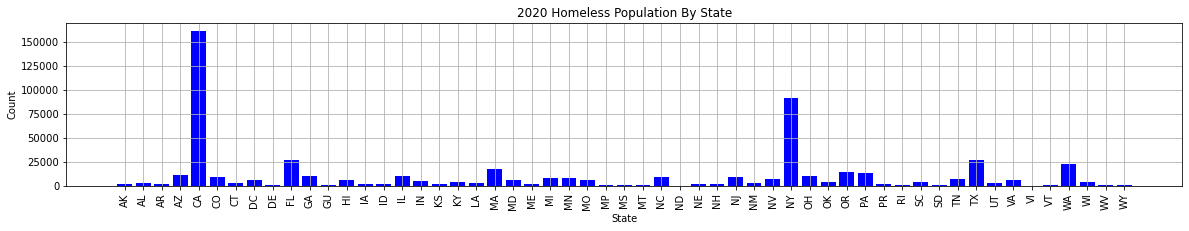

In [4]:
#store variables
states=pop2020_df['State']
count=pop2020_df['Overall Homeless, 2020']
x_axis=np.arange(len(states))

#set ticker labels for each number in the length of x axis
tick_locations = [value for value in x_axis]

#create graph and size
plt.figure(figsize=(20,3))
plt.bar(x_axis, count, color="b", align="center")

#plot ticker labels
plt.xticks(tick_locations, states, rotation="vertical")

#plot title, x, and y labels
plt.title("2020 Homeless Population By State")
plt.xlabel("State")
plt.ylabel("Count")
plt.grid()
plt.savefig('../Graphs/2020 Homeless Population By State.png')

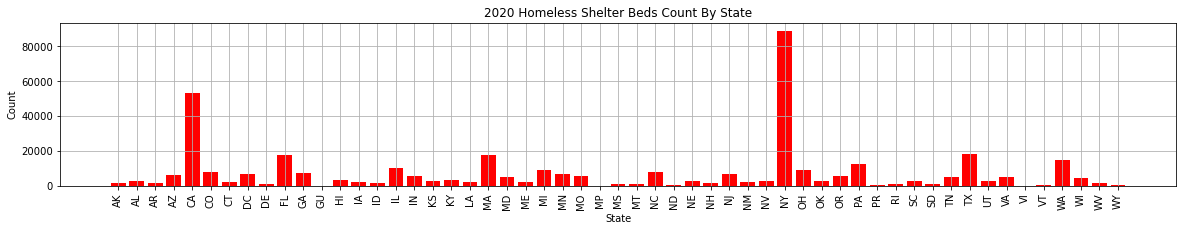

In [5]:
#store variables
states=beds2020_df['State']
count=beds2020_df['Total Year-Round Beds 2020']
x_axis=np.arange(len(states))

#set ticker labels for each number in the length of x axis
tick_locations = [value for value in x_axis]

#create graph and size
plt.figure(figsize=(20,3))
plt.bar(x_axis, count, color="r", align="center")

#plot ticker labels
plt.xticks(tick_locations, states, rotation="vertical")

#plot title, x, and y labels
plt.title("2020 Homeless Shelter Beds Count By State")
plt.xlabel("State")
plt.ylabel("Count")
plt.grid()
plt.savefig('../Graphs/2020 Homeless Shelter Beds Count By State.png')

In [130]:
#store total count of beds for each year
totalbeds_2020=beds_df["Total Year-Round Beds 2020"].sum()
totalbeds_2019=beds_df["Total Year-Round Beds 2019"].sum()
totalbeds_2018=beds_df["Total Year-Round Beds 2018"].sum()
totalbeds_2017=beds_df["Total Year-Round Beds 2017"].sum()

#create new data frame
totalbeds_df=pd.DataFrame({
             "2017":[totalbeds_2017],
             "2018":[totalbeds_2018],
             "2019":[totalbeds_2019],
             "2020":[totalbeds_2020]
})

#rotate data frame and convert to numpy
totalbeds_transpose=totalbeds_df.transpose()
totalbeds_transpose1=totalbeds_transpose.to_numpy()

In [131]:
#store total count of homeless pop for each year
totalpop_2020=pop_df["Overall Homeless, 2020"].sum()
totalpop_2019=pop_df["Overall Homeless, 2019"].sum()
totalpop_2018=pop_df["Overall Homeless, 2018"].sum()
totalpop_2017=pop_df["Overall Homeless, 2017"].sum()

#create new data frame
totalpop_df=pd.DataFrame({
             "2017":[totalpop_2017],
             "2018":[totalpop_2018],
             "2019":[totalpop_2019],
             "2020":[totalpop_2020],
})

#rotate data frame and convert to numpy
totalpop_df_transpose=totalpop_df.transpose()
totalpop_df_transpose1=totalpop_df_transpose.to_numpy()

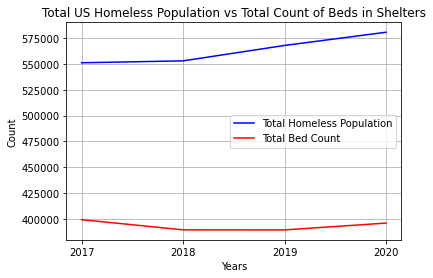

In [132]:
#create years for graph
years=['2017','2018','2019','2020']

#plot each data frame and legend
totalpop, = plt.plot(years, totalpop_df_transpose1, color="blue", label="Total Homeless Population" )
totalbeds,= plt.plot(years, totalbeds_transpose1, color="red", label="Total Bed Count" )
plt.legend(handles=[totalpop, totalbeds], loc="best")

#labels
plt.title('Total US Homeless Population vs Total Count of Beds in Shelters')
plt.xlabel('Years')
plt.ylabel('Count')
plt.grid()
plt.savefig('../Graphs/Total US Homeless Population vs Total Count of Beds in Shelters.png')

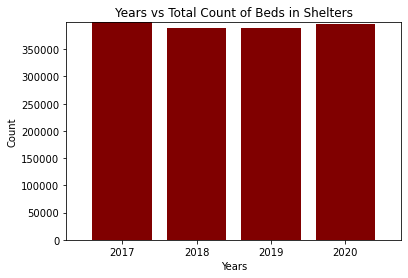

In [152]:
#create data from of just beds count over years
#rotate data frame and reset index so State is a column
totalbeds_df2= totalbeds_df.transpose().reset_index()

#create bar plot 
plt.bar(years,totalbeds_df2[0],color='maroon')

#title and labels
plt.title('Years vs Total Count of Beds in Shelters')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xlim(-0.75, len(years)-0.25)
plt.ylim(0, max(totalbeds_df2[0])+.4)

plt.savefig('../Graphs/Years vs Total Count of Beds in Shelters.png')